In [1]:
# Example how to calculate the RV precision

In [24]:
from eniric import Qcalculator
import matplotlib.pyplot as plt
from eniric.resample import resample


ImportError: cannot import name 'resample'

In [25]:
# Load a spectrum
from astropy.io import fits
data = fits.getdata("/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_1_bervcorr.fits")
wav = data["Wavelength"]
flux = data["Flux"]
# wav = fits.getdata() / 10
# flux = fits.getdata()

print(len(flux))

1024


In [26]:
# Select a section of wavelength
xmin = 2000  # nm
xmax = 3000  # nm
mask = (wav>=xmin) & (wav<=xmax)
wav=wav[mask]
flux=flux[mask]

print(len(flux))

1024


In [27]:
precision = Qcalculator.RVprec_calc(wavelength=wav, flux=flux)

print(f"RV precision between {xmin}-{xmax} = {precision}")

RV precision between 2000-3000 = 7409.261969559676 m / s


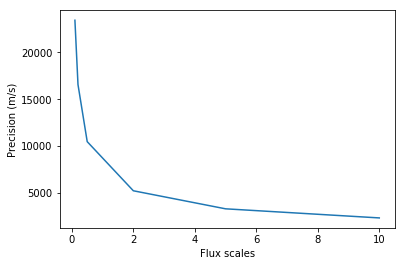

In [30]:
# The precision needs to be scaled to the relative SNR.
scales = [0.1, 0.2, 0.5, 2, 5, 10]
prec = [Qcalculator.RVprec_calc(wavelength=wav, flux=flux * scale).value for scale in scales]

plt.plot(scales, prec)
plt.xlabel("Flux scales")
plt.ylabel("Precision (m/s)")
plt.show()
